<a href="https://colab.research.google.com/github/Mdrsilva/Credit_Card_Fraud_Detection_Data_Analysis/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Data Science and Data Analysis**
*by [Marriane Silva](https://github.com/Mdrsilva)*

[![LinkedIn](https://img.shields.io/badge/LinkedIn-marrianesilva-blue.svg)](https://www.linkedin.com/in/marriane-dos-reis-silva/)[![GitHub](https://img.shields.io/badge/GitHub-marrianesilva-purple.svg)](https://github.com/Mdrsilva)
---

# **Credit Card Fraud Detection using Machine Learning Models**


One of financial institutions' main concerns is detecting credit card fraud.

According to the Chartered Professional Accountants of Canada (CPA Canada) Study, approximately 46% of Canadian respondents have been victims of financial fraud at some point in their lives .

The study found that credit card fraud remains the leading type of financial fraud. Approximately 24% of respondents have been victims, followed by email or phishing fraud, with 8% have been a victim of.
More can be found [here](https://www.cpacanada.ca/en/the-cpa-profession/about-cpa-canada/media-centre/2022/february/many-canadians-report-being-a-victim-of-financial-fraud-but-may-not-be-doing-enough-to-avoid-it).

[According to the 2022 IBM Global Financial Fraud Impact Report](https://filecache.mediaroom.com/mr5mr_ibmnewsroom/193031/MC%20%2B%20IBM%20Financial%20Fraud%20Study%20-%20Global%20Report%20Updated%203.8.22.pdf), credit card fraud is the most common type of fraud experienced across all countries.

With that, detection has become more important than ever.
It is substantial for organizations to identify fraudulent transactions so the card may be blocked and the transactions fail immediately.

In recent years, as the amount of data has exploded and the number of payment card transactions has significantly increased, fraud detection has become largely digitized and automated.

Most modern solutions leverage artificial intelligence (AI) and machine learning (ML) to manage data analysis, predictive modelling, decision-making, and fraud alerts that occur when individual instances of credit card fraud are detected. Investment in fraud detection using AI and ML has been growing every year, representing a great opportunity in Data Science.

<p align=center>
<img src="https://img.freepik.com/free-photo/high-angle-lock-with-credit-cards-top-laptop_23-2148578118.jpg?w=1060&t=st=1676162892~exp=1676163492~hmac=45bbebf8d607e794de8b79b2a228598f1c79cf82faf27f24300713580d32268a" width="80%"></p>

The dataset I will use in this project is available on [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) and contains transactions made by European cardholders in September 2013.

Due to confidentiality issues and to preserve personal information, the original features and more background information about the data were not provided.

As informed in the dataset description, there are 492 frauds out of 284,807 transactions. The dataset is highly imbalanced. The positive class (frauds) accounts for 0.172% of all transactions.

This is something common due to the nature of the data, as it is expected that the number of genuine credit card transactions is far greater than the number of fraudulent transactions. I will address this issue in the "Dealing with an imbalanced dataset" section.


In this project, I will implement machine learning models to effeciently identify credit card frauds based on the dataset available and then will compare the models' performance.

# **Imports**

Below there are some of the libraries used in this project.

- `pandas` for data manipulation
- `numpy` for general manipulation of numbers and arrays
- `matplotlib` and `seaborn` for data visualization
- `RandomUnderSampler` class to balance the dataset
- `scikit-learn` classes and functions to prepare the data, create and evaluate the models

In [ ]:
# Install the scikit-plot library
!pip install -q scikit-plot

In [ ]:
# Importing the required libraries needed for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt


# Settings for style and appearance
sns.set_style()
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

# Showing all columns in the head() command
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', None);


# **Obtaining the Data**

The data used in this project is on the  [*Kaggle*](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) website and is composed of 1 table, **creditcard.csv**, which includes the transactions that occurred in two days in September 2013 by European cardholders.

The dataset is highly imbalanced; the positive `Class` (frauds) account for 0.172% of all transactions. It is expected on this type of dataset although the fraud rates are increasing worldwide, it is more likely that a transaction is legal than illegal.

I will use a balancing technique before using the machine learning algorithm and training the model. Otherwise, I may get a biased model which performs well in the majority class (non-fraud) but poorly in the class with low frequency (fraud).

In the **Variables dictionary** section, I will discuss the variables used in my analysis.

Before moving forward, I will import the table.


In [ ]:
# Importing the data
file_path = "https://www.dropbox.com/s/jpqwzu25jbvz66g/creditcard.csv?dl=1"
df= pd.read_csv(file_path)

# **Understanding the Dataset**

Understanding the data is a fundamental step in any data science project.

Here we focus on examining the data, extracting insights and main characteristics, and understanding how the information is structured.

This step helps us understand the type of problem and how we will solve it.

## **Variables dictionary**


* `Time` - Number of seconds elapsed between this transaction and the first transaction in the dataset.
*  `Amount`	-   Transaction amount (in Euro).
* `Class` - Categorical variable, which takes value 1 for fraudulent and 0 for genuine transactions.
* `V1, V2, V3, ..., V28`	- Numerical variables, resulting from a PCA dimensionality reduction. Original attributes were not disclosed to protect user identities and sensitive features.

# **Exploratory Data Analysis (EDA)**
This step is essential to analyze and investigate the dataset and summarize the main characteristics.

Let's check the **creditcard.csv** size and take a look at the table, displaying the first five entries.

In [ ]:
# Checking dataset's size and number of variables
print("Entries:\t{}".format(df.shape[0]))
print("Variables:\t{}".format(df.shape[1]))
print("\n")

# Displaying the first entries of the dataset
df.head()

Entries:	284807
Variables:	31




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's take a look at the label distribution in the target column.

In [ ]:
# Displaying frequency distribution of the target column
print(df.Class.value_counts())
print("\n Fraudulent transactions represent {:.4f}% of the dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

0    284315
1       492
Name: Class, dtype: int64

 Fraudulent transactions represent 0.1727% of the dataset.




* The dataset has **284,807 entries** (or transactions registered during the timeframe) and **31** columns or variables.

* Among the transactions that occurred in the two days, we have 492 frauds out of 284,807 transactions. The dataset is highly imbalanced; the positive class (frauds) accounts for 0.172% of all transactions.

* The variables went through a transformation known as [Principal Component Analysis (PCA)](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html). The PCA is a method to transform the columns of a dataset into a new set of features. It allows dimensionality reduction, while representing the information from the original dataset. The transformation is also useful as a tool for visualization and feature selection within high-dimensional data.

* The components obtained through PCA are identified by $[V1, V2, V3 \dots, V28]$. They are all numeric values.

* The `Time` and `Amount` are the only two features that have not been transformed with PCA and are displayed with their original value.

* The `Class` column represents the target (1 for fraud and 0 otherwise).



## **Dealing with missing values**

The quality of a dataset is related to the number of missing values. Understanding whether these null values are significant compared to the total entries is crucial to avoid future problems in the analysis.

That being said, it is crucial to be able to deal with messy data, whether that means missing values, inconsistent formatting, disarranged records, or meaningless outliers.

Below, let's display the variable's type and check if there are any missing values.

In [ ]:
# Checking types of variables and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All columns are of **float** type except for `Class`, which is of **integer** type.
I conclude that there are no missing values in the dataset, so they will not need to be dealt with after splitting the dataset into train and test subsets.


# **Train and test subsets**


Splitting the dataset is an important step when working with Machine Learning Algorithms.Before doing anything with the data, I will split the data into `train_df` (85%) and `test_df` (15%) and keep the target column (`Class`) in the splits. For this, I will use the `train_test_split()` method within **sklearn** library.

In [ ]:
# Splitting the data into train and test datasets
train_df, test_df = train_test_split(df, test_size=0.15, random_state=123)
# train_df.head()

# Checking new shapes
print("Train dataset shape: ", train_df.shape)
print("Test dataset shape: ", test_df.shape)

# Naming the train_df as my new df
df = train_df.copy()

Train dataset shape:  (242085, 31)
Test dataset shape:  (42722, 31)


As seen above, the train dataset has **24,2085** entries (or transactions registered during the timeframe) and 31 columns. The test dataset has **42,722** observations and 31 columns.

I will proceed with the explanatory data analysis using the **df** dataset. Let's check the first entries of the dataset.

In [ ]:
# Checking the first entries of the df dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
113834,73222.0,-1.047911,0.264798,2.882793,1.050493,-1.754437,1.013074,-1.216518,0.993989,-0.289283,0.066573,-1.418042,0.203715,-0.404378,-0.799671,-1.157621,-2.831097,1.610435,0.837103,0.153897,-0.374125,-0.392708,-0.197803,-0.109727,0.396181,0.181980,-0.065889,0.328321,0.089068,12.00,0
209720,137676.0,1.862475,-0.187619,-1.762891,0.300562,0.274679,-0.482736,0.026326,-0.034559,0.755427,-0.708220,1.257754,0.950918,-0.279832,-1.228754,-0.727521,0.145695,0.878436,0.465375,0.324876,-0.035498,-0.157633,-0.394398,0.168381,0.589022,-0.118405,-0.144933,-0.023933,-0.014421,69.32,0
6086,6942.0,1.475676,-0.082584,-0.176180,-0.551063,-0.255257,-1.112522,-0.028757,-0.549704,-0.061398,0.273464,0.642910,-2.476152,3.262848,1.241391,-0.445996,0.734997,0.926936,-1.386860,0.557479,0.128606,0.033541,0.348765,-0.215062,0.059112,0.866292,-0.106655,-0.046937,-0.004705,15.00,0
15352,26742.0,0.028552,-2.235673,0.517263,0.642202,-1.330937,1.093816,-0.222273,0.376028,0.885882,-0.545425,1.254144,1.150079,-0.597851,-0.071041,-0.413196,-0.379392,0.484018,-0.870021,-0.207921,0.932355,0.196759,-0.399784,-0.342213,-0.203934,-0.255216,0.896698,-0.107922,0.091284,549.81,0
201339,133843.0,1.964985,-0.418204,-0.380086,0.428730,-0.753728,-0.668689,-0.557784,-0.048365,1.359894,-0.092521,-0.936322,0.030681,-0.472463,0.118894,1.115812,0.274248,-0.603881,0.300436,-0.425419,-0.238540,0.216086,0.751400,0.136596,-0.086692,-0.173467,-0.235863,0.030625,-0.036667,19.78,0


## **Descriptive statistics**

We can show some basic statistical details for the numeric variables using the Pandas `describe()` function.

In [ ]:
# Generating descriptive statistics of the numeric columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000,242085.000000
mean,94806.048727,-0.000966,-0.001609,0.001688,-0.000245,0.002539,0.001618,0.000708,0.000631,-0.000175,0.000093,0.000043,-0.000606,0.000137,-0.001153,0.000153,0.001040,0.000888,-0.000688,0.001169,-0.000684,-0.000641,-0.000977,0.000047,0.000313,0.000318,-0.000097,0.000109,-0.000204,88.315482,0.001706
std,47525.827850,1.957994,1.651923,1.510102,1.415920,1.383998,1.337012,1.236632,1.189141,1.097739,1.087175,1.020467,0.997992,0.993816,0.956511,0.915890,0.875538,0.847350,0.837853,0.814320,0.773403,0.734959,0.725442,0.633414,0.606125,0.521330,0.481686,0.402505,0.328193,251.187273,0.041269
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54177.000000,-0.921087,-0.597801,-0.887218,-0.847439,-0.689414,-0.767519,-0.553985,-0.207704,-0.642806,-0.535402,-0.763345,-0.406392,-0.647053,-0.426546,-0.584284,-0.466788,-0.483743,-0.498850,-0.454359,-0.211526,-0.228438,-0.542929,-0.161640,-0.354909,-0.317061,-0.326579,-0.070991,-0.052938,5.640000,0.000000
50%,84666.000000,0.016222,0.066099,0.181276,-0.020955,-0.052259,-0.273447,0.040242,0.022888,-0.051748,-0.093064,-0.033134,0.139791,-0.013159,0.049163,0.048761,0.068053,-0.064999,-0.004292,0.005610,-0.062042,-0.030179,0.005607,-0.010624,0.041016,0.016999,-0.052205,0.001275,0.011252,22.000000,0.000000
75%,139398.000000,1.315678,0.802435,1.026717,0.741222,0.613907,0.399907,0.570849,0.328117,0.597096,0.453356,0.739624,0.618032,0.661968,0.492523,0.648965,0.524437,0.401239,0.501370,0.459424,0.133336,0.185780,0.526383,0.147474,0.440626,0.350742,0.240197,0.091006,0.078149,77.000000,0.000000
max,172792.000000,2.454930,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,19.587773,10.370658,15.331742,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000


* As we can see, there are no visible discrepancies in the variables transformed using the PCA method.

* Considering both classes (fraud or non-fraud transactions), the mean amount was 88.32, the median was 22, and the standard deviations was 251.19. The max amount was approximately 25,691, far from the mean amount. This huge difference between the mean and max is an indicator of the presence of outliers. It is also possible to see that most of the transactions (75%) were below 77.


## **Dealing with an imbalanced dataset**

As informed in the dataset description, the dataset is imbalanced, with the positive class (frauds) accounting for a small amount of all transactions.


Due to the dataset's imbalanced nature, some categories show up more often than others. As expected, we will likely see a lot more genuine transactions than fraudulent.

In general, when a dataset is imbalanced, accuracy only provides part of the context.

Let's take a look of the label distribution in the target column `Class`.

0    241672
1       413
Name: Class, dtype: int64

 Fraudulent transactions represent 0.1706% of the dataset.



[]

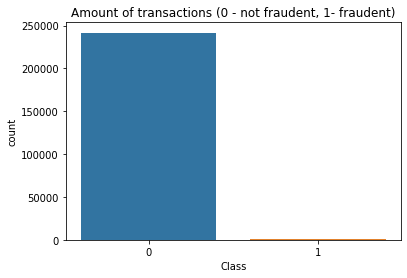

In [ ]:
# Checking for unbalanced data
print(df.Class.value_counts())
print("\n Fraudulent transactions represent {:.4f}% of the dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# Generating a bar plot using seaborn
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Amount of transactions (0 - not fraudent, 1- fraudent)')
plt.plot()

When we are building a machine learning model for classification, the consequence of this imbalance is that the model will tend to give a lot of “false alarms”.

In the example of credit card fraud detection (where the number of regular financial transactions is way greater than the number of fraudulent transactions), a classifier model will tend to show more false negatives, which is undesirable for financial institutions.
That is because the model will respond very well to inputs for the majority classes (negatives or non-frauds), but will perform poorly for minorities (positives or frauds).

If we have to choose between the two situations, it would be preferable to have more false positives than false negatives in this context.

However, the high false positive detection for fraud can bring problems too. The over detection can be inconvenient, blocking purchases detected as atypical.

Therefore, during data preparation, I will need to balance the dataset to get a non-biased model.

## **Features Time and Amount**

Let's display the frequency of fraud and non-fraud transactions over 48 hours.

In [ ]:
print(f"Total time elapsed: {df.Time.max():.0f} seconds or {df.Time.max()/3600:.2f} hours.")

Total time elapsed: 172792 seconds or 48.00 hours.


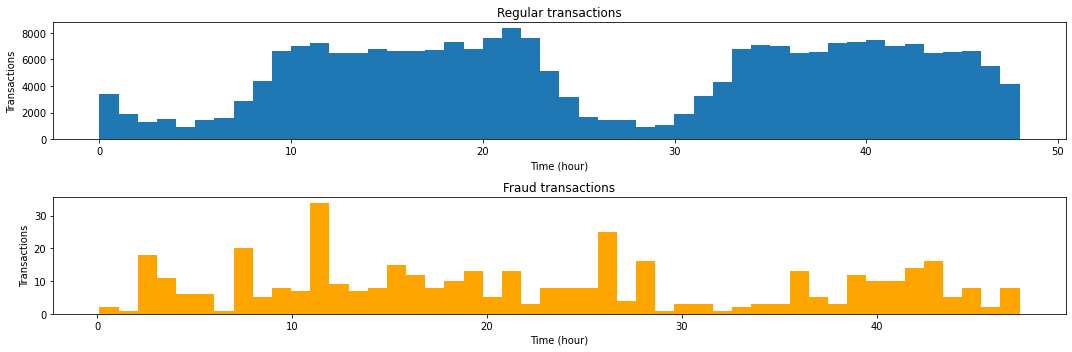

In [ ]:
# Plotting transactions class over time
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,5))

df[df.Class==0].Time.div(3600).hist(ax=ax1, label='Non-fraud', bins=48)
ax1.grid(False)
ax1.set_title('Regular transactions')
ax1.set_ylabel('Transactions')
ax1.set_xlabel('Time (hour)')

df[df.Class==1].Time.div(3600).hist(ax=ax2, color='orange', label='Fraud', bins=48)
ax2.grid(False)
ax2.set_title('Fraud transactions')
ax2.set_ylabel('Transactions')
ax2.set_xlabel('Time (hour)')

plt.tight_layout();

As seen above, there are more regular transactions during specific periods with a reduction during certain hours, likely due to evening periods. The fraud occurence does not follow the same pattern, as some peaks happen during periods with fewer genuine transactions.

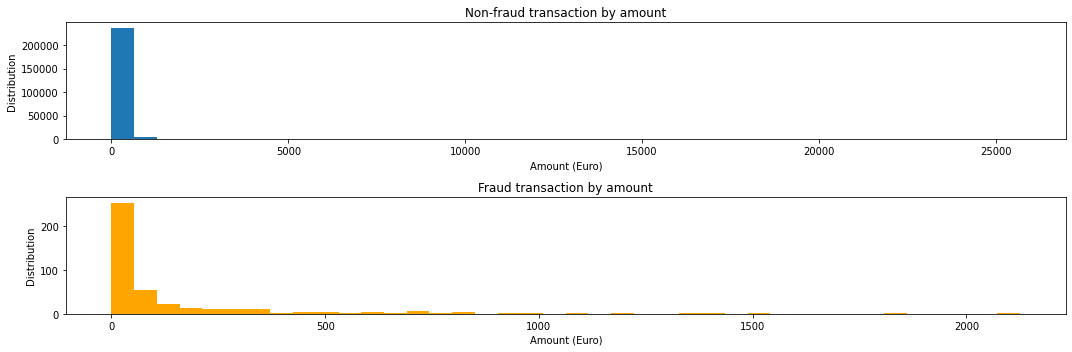

In [ ]:
# Plotting transactions class by amount
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,5))

df[df.Class==0].Amount.hist(ax=ax1, bins=40)
ax1.grid(False)
ax1.set_title('Non-fraud transaction by amount')
ax1.set_ylabel('Distribution')
ax1.set_xlabel('Amount (Euro)')

df[df.Class==1].Amount.hist(ax=ax2, color='orange', bins=40)
ax2.grid(False)
ax2.set_title('Fraud transaction by amount')
ax2.set_ylabel('Distribution')
ax2.set_xlabel('Amount (Euro)')

plt.tight_layout();

The transaction amount differs significantly between genuine and fraudulent transactions. Genuine transactions have a wider range, reaching the value of 25,691.16 euros, as seen in the descriptive statistics table shown previously.

Fraudulent transactions were not over 2,500 euros. Criminals do not want to raise suspicion so they purchase services and goods in lower amounts. Another explanation is that high-value transactions require confirmation details before the transaction is authorized.

By looking strictly at this, if the transaction amount is over 5,000 euros, the transaction is likely genuine. But I will not jump to any conclusions just yet.


## **Checking outliers**

By using the histogram distribution, it is possible to verify the evidence of outliers (these are unusual values, in other words, data points differ significantly from other observations). Outliers present a particular challenge for analysis. Identifying, understanding and treating these values is essential, as they can give us an incorrect picture of our data.

###_Why do outliers exist?_
There are generally two reasons for the existence of outliers:

First, the data might be entered incorrectly. This can be a result of human error, errors generated by the system or a result of an incorrect calculation. Second, they may be real data points which are present because of the nature of the data.

###_How to identify outliers with a boxplot_

It is necessary to find the boxplot's upper and lower limits using the IQR Score.

The IQR Score method lists the data values from least to greatest. When the values are in ascending order, it is possible to identify the median (Q2). This value is the midpoint in the data set,  dividing the data into a lower 50% and an upper 50%.

The IQR is calculated by subtracting the third quartile - Q3 (75%) from the first quartile - Q1 (25%).

* IQR = Q3 - Q1

All values that fall outside the minimum and maximum, according to the picture, are considered outliers.

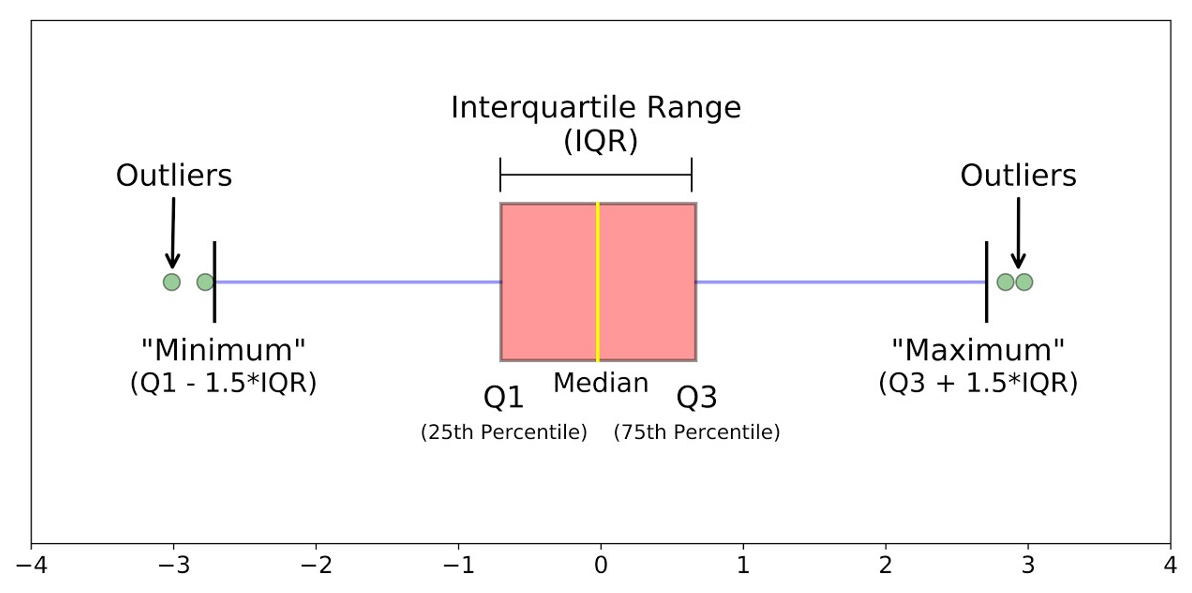


Let's take a look at the `amount` variable boxplot, isolated by legal and fraudulent transactions, and see the findings.

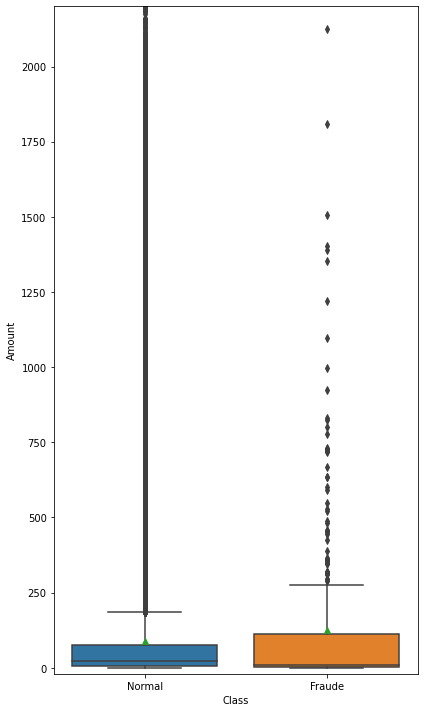

In [ ]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 2200))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

In [ ]:
# Verifying descriptive statistics for the fraud transactions
df[df.Class == 1]['Amount'].describe()

count     413.000000
mean      127.245860
std       264.328531
min         0.000000
25%         1.000000
50%         9.990000
75%       111.700000
max      2125.870000
Name: Amount, dtype: float64

There are outliers in both classes and many values are far from the respective means (indicated by the green triangle in the boxplot chart).

There is more variability in the amount considering the non-fraud data. We can also see that the maximum value in a fraud transaction during the 48 hour period was 2,125.87, the mean value was 127.25, and the median was 9.99. This confirms the scammers deal with transactions in lower amounts, avoiding additional requirements standard in transactions with a higher amount.

In general, we can see a different distribution of transactions for the two classes, which will contribute to the Machine Learning model training.

## **Density chart**

A Kernel Density Estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, similar to a histogram.

The density chart is handy for comparing the distributions of the variables for each class and seeing which ones are most important for detecting anomalies.

In this type of view, we are looking at the distributions that differ from one another, allowing us to identify fraud more easily.

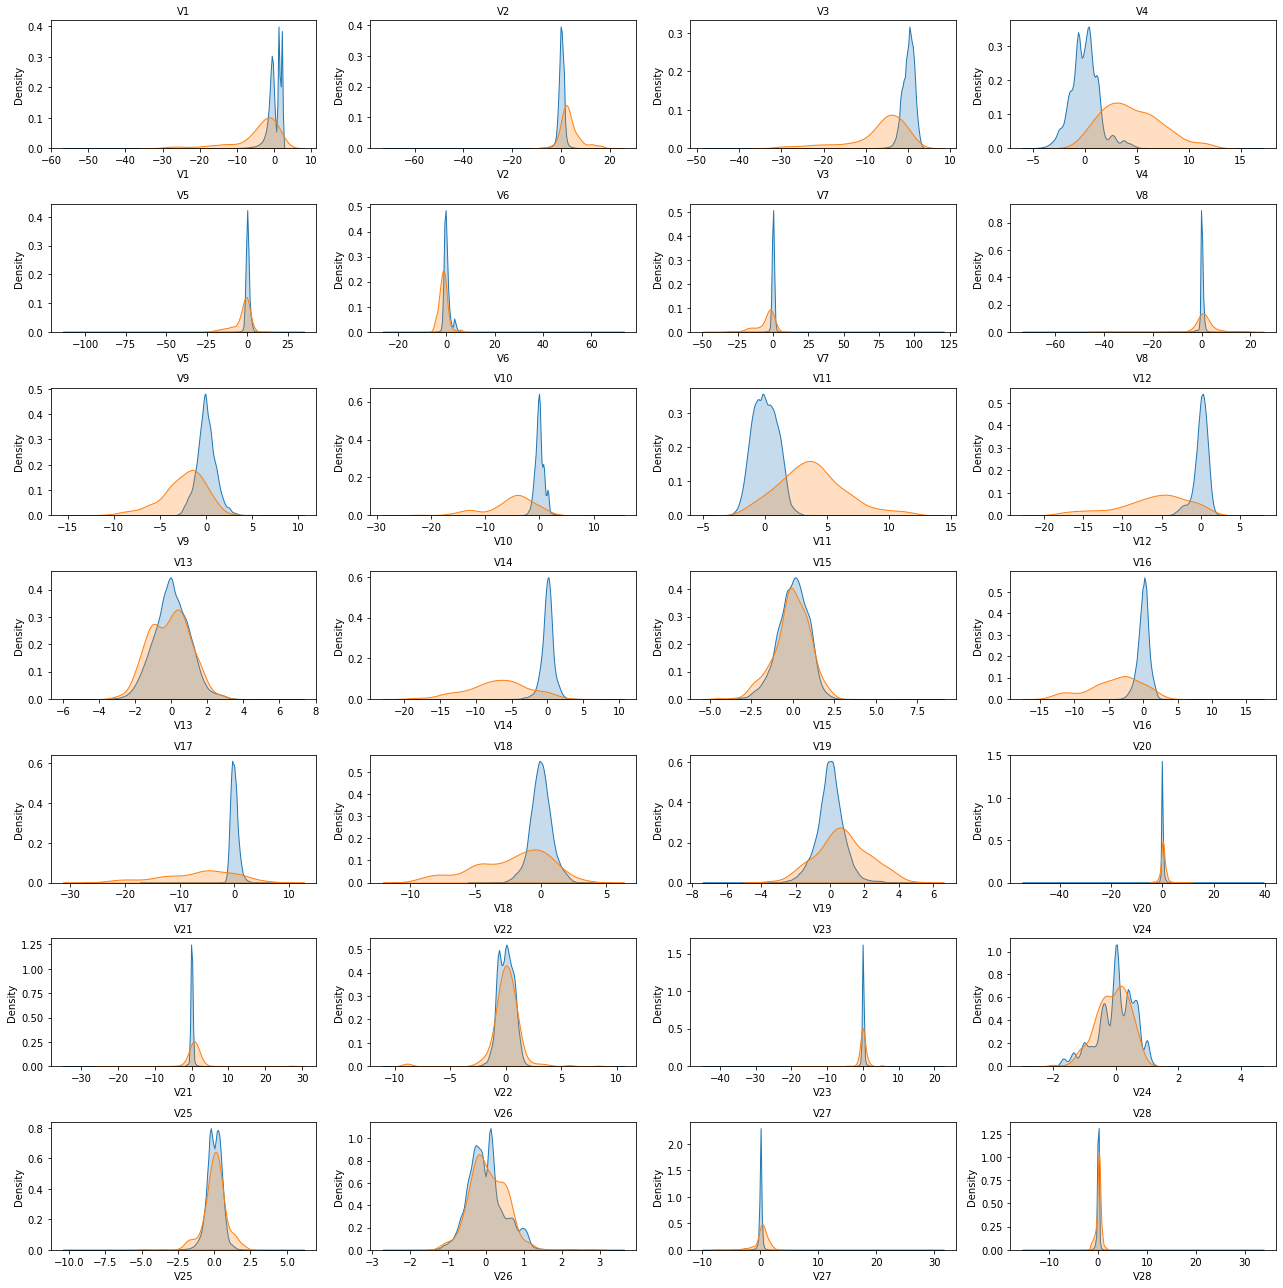

In [ ]:
# Plotting a KDE for the V's variables for fraud and non-fraud
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots( nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot( 7, 4, idx)
    sns.kdeplot( df_class_0[col] , label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

As seen above, `V3`, `V4`, `V10`, `V11`, `V12`, `V14` and `V17` features have distinct distributions for fraud and non-fraud transactions.

On the other hand, features such as `V8`, `V13`, and `V15` have a similar distribution. In other words, these features' behaviour for fraud and genuine transactions do not present significantly different patterns.

As PCA is sensitive to the scale of the variables, it is assumed that these original V's features were standardized.

Standardization comes into the picture when features of the input dataset have significant differences between their ranges or when measured in different units. Since `Time` and `Amount` variables are not standardized, I will standardize them.

Once the standardization is done, all the features will have a mean of zero and a standard deviation of one, and thus, the same scale.

Briefly, from the EDA we can conclude that:

* The dataset is composed of numeric variables;
* There are no missing values;
* Since the PCA method is sensitive to the scale of the variables, it is assumed that these original V's features were standardized;
* `Time` and `Amount` variables have not been standardized yet;
* The target column (`Class`) is highly imbalanced;
* Fraud and non-fraud transactions present different distribution patterns, with lower amount for fraudulent incidents;
* A few V's features have similar distribution for fraud and genuine transactions, while others present a very different pattern. Those with a more distinct pattern will be more useful in contributing to the training of the Machine Learning Model.

# **Data pre-processing**

In this section, I will:

- Standardize `Time` and `Amount` features;
- Split the training dataset into train and validation sets; and
- Balance the data to avoid poor performance for class 1 and *overfitting*.


## **Standardize Time and Amount features**

Standardization is an important technique mainly performed as a pre-processing step before many machine learning models to adjust the range of features of an input dataset.

These differences in the ranges of initial features can cause trouble for many machine learning models. For example, for models based on distance computation, if one of the features has a broad range of values, the distance will be governed by this particular feature.

In principal component analysis, features with high variances or wide ranges get more weight than those with low variances. Consequently, they end up  dominating the first principal components (components with maximum variance). The reason these features have high variances compared to the other ones is because they were measured in different scales. Standardization can prevent this by giving the same weightage to all features.

So, since PCA is sensitive to the scale of the variables, it is assumed that these original V's features were already standardized.

It is important to standardize the `Time` and `Amount` features because they present different magnitudes and variations, which can bias the model training. For this, I will use the **StandardScaler** method within **scikit-learn** library. It is done by subtracting the mean and dividing by the standard deviation of each feature value.

Once the standardization is completed, all the features will have a mean of zero and a standard deviation of one, thus, the same scale.

I will make a copy of the dataframe and name it **df_clean**.


In [ ]:
# Making a copy of the dataframe
df_clean = df.copy()

# Standardize Time and Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

# Dropping the original columns Time and Amount
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Checking first entries
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
113834,-1.047911,0.264798,2.882793,1.050493,-1.754437,1.013074,-1.216518,0.993989,-0.289283,0.066573,-1.418042,0.203715,-0.404378,-0.799671,-1.157621,-2.831097,1.610435,0.837103,0.153897,-0.374125,-0.392708,-0.197803,-0.109727,0.396181,0.181980,-0.065889,0.328321,0.089068,0,-0.303820,-0.454155
209720,1.862475,-0.187619,-1.762891,0.300562,0.274679,-0.482736,0.026326,-0.034559,0.755427,-0.708220,1.257754,0.950918,-0.279832,-1.228754,-0.727521,0.145695,0.878436,0.465375,0.324876,-0.035498,-0.157633,-0.394398,0.168381,0.589022,-0.118405,-0.144933,-0.023933,-0.014421,0,-0.075623,0.902037
6086,1.475676,-0.082584,-0.176180,-0.551063,-0.255257,-1.112522,-0.028757,-0.549704,-0.061398,0.273464,0.642910,-2.476152,3.262848,1.241391,-0.445996,0.734997,0.926936,-1.386860,0.557479,0.128606,0.033541,0.348765,-0.215062,0.059112,0.866292,-0.106655,-0.046937,-0.004705,0,-0.291876,-1.848768
15352,0.028552,-2.235673,0.517263,0.642202,-1.330937,1.093816,-0.222273,0.376028,0.885882,-0.545425,1.254144,1.150079,-0.597851,-0.071041,-0.413196,-0.379392,0.484018,-0.870021,-0.207921,0.932355,0.196759,-0.399784,-0.342213,-0.203934,-0.255216,0.896698,-0.107922,0.091284,0,1.837257,-1.432152
201339,1.964985,-0.418204,-0.380086,0.428730,-0.753728,-0.668689,-0.557784,-0.048365,1.359894,-0.092521,-0.936322,0.030681,-0.472463,0.118894,1.115812,0.274248,-0.603881,0.300436,-0.425419,-0.238540,0.216086,0.751400,0.136596,-0.086692,-0.173467,-0.235863,0.030625,-0.036667,0,-0.272847,0.821386


In [ ]:
# Checking mean and standard deviation of the new transformed features
print('The std_amount variable has mean {:.2f} and standard deviation {:.2f}.'.format(df_clean['std_amount'].mean(), df_clean['std_amount'].std()))
print('The std_time variable has mean {:.2f} and standard deviation {:.2f}.'.format(df_clean['std_time'].mean(), df_clean['std_time'].std()))

The std_amount variable has mean 0.00 and standard deviation 1.00.
The std_time variable has mean 0.00 and standard deviation 1.00.


## **Train-validation set split**

Before doing the rebalance in the target column, I will split the training data into the train set (which will be used to train the models, select the best model and adjust the parameters), and the validation set (used to evaluate the performance of each model, after it has been trained on the initial data set).

We do not want to touch the test set, which was isolated in the beginning of this project until the end, when we have selected the model with the best performance in the validation set. The test set is provided as if it is new data, so that the model predictions can be compared to the actual classification of each operation.

I will also need to specify X and y variables for modelling purposes. The X is composed of the independent features or explanatory variables, and the y variable is the dependent variable, the target column that we are trying to predict.

- Let's now separate our feature vectors (X) from the target (y). All the columns except for `Class` are the X, and the `Class` column is the target (1 if fraud and 0 otherwise).

I will use a 85/15 proportion. That is, 85% of the data will be used to train the model, while 15% will be used to validate the results afterwards.

In [ ]:
# Splitting variables into X and y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# Splitting data into train and validation datasets
# Stratify=y does a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify
X_train, X_val, y_train, y_val = train_test_split(X, y , test_size=0.15, stratify=y, shuffle=True)

In [ ]:
X_train.shape

(205772, 30)

In [ ]:
y_train.shape

(205772,)

## **Balancing the dataset**

The dataset is considered imbalanced when it has a high difference between the number of observations of the classes.

To certify that the model is properly able to detect patterns of both classes, one of the options is to balance the dataset, so it has a similar number of information for all classes.

Our dataset showed that only 0.17% of the transactions are fraudulent. This situation can be a problem as we want to predict fraudulent transactions. Some machine learning models would not detect it correctly as the amount is very minimal compared to the whole dataset.

We want to balance it, so the fraction that represents fraud gets more representattion in the feature and will prevent under-detection.

There are many ways to do the balancing and an approach that has been widely used with great results is the sampling approach.

Sampling is a pre-processing that aims to minimize discrepancies between classes through resampling. To generate a balanced set, the following techniques are commonly used:

- **Oversampling**: creates new observations of the minority class from the information contained in the original data. This generation of new entries can be done randomly with the aid of clustering techniques or synthetically.

- **Undersampling**: reduces dataset imbalance by focusing on the majority class. It randomly eliminates entries from the class with the highest number of occurrences. This technique is ideal in situations where you have large volumes of data.

In this project I will use Random **Undersampling** to preserve the minority class.


0    351
1    351
Name: Class, dtype: int64

Shape of y_train (before balancing):
 (205772,)

Shape of y_rus:
 (after balancing) (702,)


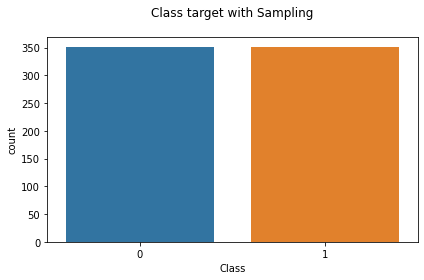

In [ ]:
# Using undersampling technique
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Checking for classes balance
print(pd.Series(y_rus).value_counts())

# Plotting new Class distribution
fig, ax = plt.subplots()
sns.countplot(y_rus, ax=ax)
ax.set_title('Class target with Sampling\n')

plt.tight_layout();
print('\nShape of y_train (before balancing):\n', y_train.shape)
print('\nShape of y_rus:\n (after balancing)', y_rus.shape)

As we can see in the picture above, after treating the imbalance issue, we no longer have a discrepancy between the classes. The balancing reduced the shape of the training subset from 205,722 to a much smaller dataset (702 transactions, 351 frauds and 351 genuine). Now the classes have equal weight.

## **Balancing**

Let's check the correlation matrix to identify which features are more correlated before and after the balancing. Below, I will create a correlation heatmap for all variables in the dataset.

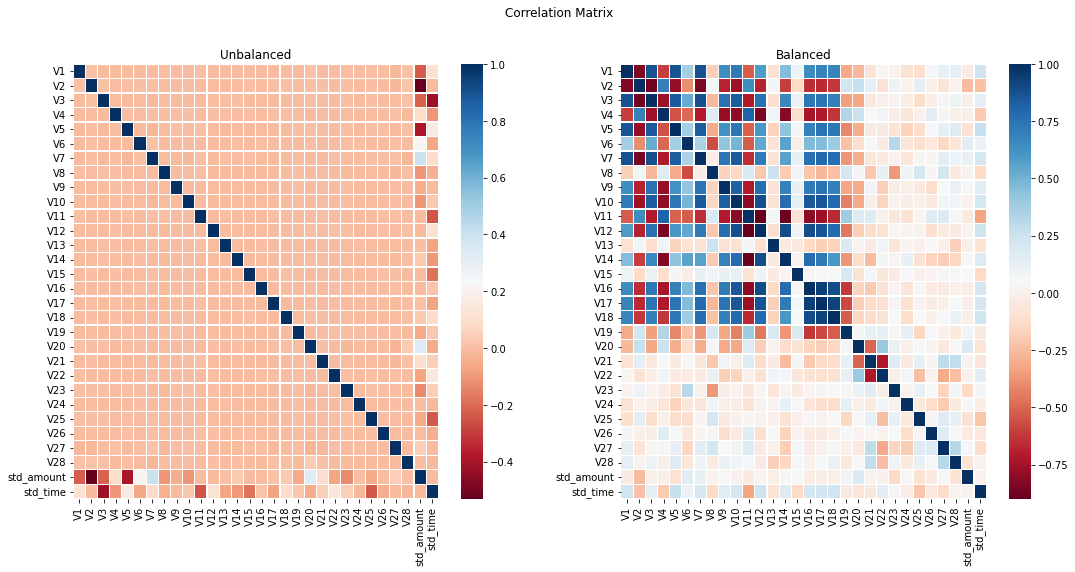

In [ ]:
# Checking the correlation for features
corr = X_train.corr()
corr_rus = X_rus.corr()

# Creating the correlation matrix
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (18,8))

fig.suptitle('Correlation Matrix')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap='RdBu', ax=ax0)
ax0.set_title('Unbalanced')

sns.heatmap(corr_rus, xticklabels=corr_rus.columns, yticklabels=corr_rus.columns, linewidths=.1, cmap='RdBu', ax=ax1)
ax1.set_title('Balanced')

plt.show()

As seen above, before the data balancing, the overall correlation was almost non-existent, bringing no relevant information. After balancing the data, we increased the correlation bringing more information, mainly among the first 18 unknown features.


## **Recapping the steps I have taken so far:**
- Identification of the business problem;
- Quick data overview and discovered an imbalanced dataset;
- Standardization of the columns to have similar magnitude;
- Selection of the target variable (`Class`);
- Splitting data into training and test;
- Balancing the dataset.

# **Model Building**

Finally, let's test some Machine Learning Models to compare their performance based on the dataset. I will use supervised learning so that the model can predict labels based on labelled training data.

As we are dealing with a **classification** problem (fraud or non-fraud), I will build four classification machine learning models and see how they perform.

These are the models:

- **Logistic Regression**
- **Decision Tree**
- **K-nearest Neighbors**
- **Random Forest Classifier**

Before creating the models, let's review the metrics I will use to evaluate their performance.



## **Metrics**

Let's briefly explain the metrics I will be using in each machine learning model.

* **TP - True Positive:** when a case was positive and predicted positive;
* **TN - True Negative:** when a case was negative and predicted negative;
* **FP - False Positive:** when a case was negative but predicted positive;
* **FN - False Negative:** when a case was positive but predicted negative.

With these concepts, we can understand five metrics: ***Accuracy***, ***Precision***, ***Recall***, ***F-1 score*** and ***AUC-ROC*** (also known as AUROC).



***Accuracy***

It shows the correct answer ratio and it is calculated by dividing the number of correct answers by the total number of answers:

$${\text{Accuracy: }}\frac {\text{TP + TN}} {\text{TP+TN+FP+FN}}$$
<br>

<br>

***Precision***

It shows the proportion of positive predictions where correct (its value ranging from zero to one).

$${\text{Precision: }}\frac {\text{TP}} {\text{TP+FP}}$$

<br>

***Recall***

It shows the proportion of correct positive predictions made out of all positive cases.

$${\text{Recall: }}\frac{\text{TP}} {\text{TP+FN}}$$

<br>

***F1-Score***

The F1-Score is the harmonic mean between the **precision** and the **recall**. Its value ranges from zero to one and it is calculated using the following formula:


$${\text{F1-Score: }}\frac{\text{2 (Recall * Precision)}}  {\text{Recall + Precision}}$$

<br>


***Confusion Matrix***

A confusion matrix is a table that allows us to visualize the algorithm's performance. It will show the possible labels and how many of them the model predicts correctly and incorrectly. Example of a confusion matrix:

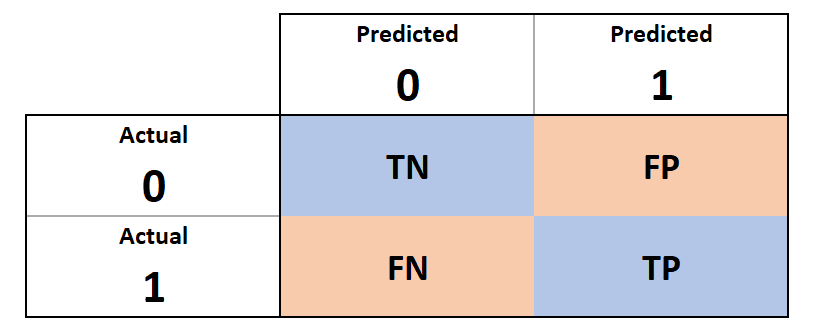

***AUC-ROC Score (Area Under the Receiver Operating Characteristics)***

This metric computes the area under the AUCROC curve. It is one of the most important evaluation metrics for checking any classification model’s performance.

Basically, it is a probability curve that measures the model capacity of classifying the classes correctly. The probability closer to 1, the better the model's accuracy to predict the classes correctly. The closer to 0, the worse the model´s performance.

More can be found here: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5).

# **Machine Learning Models**

## **Logistic Regression**

Logistic Regression is a Machine Learning algorithm which is used for classification problms. It is a predictive analysis algorithm based on the concept of probability. Examples of classification problems are classifying as "spam" or "not spam", online transactions as "fraud" or "not fraud", etc.

After instancing and training the model, I will forecast the transaction as fraud or not, based on the validation dataset, and print the five first predictions.

In [ ]:
# Defining and training a model
np.random.seed(2)
model_lr = LogisticRegression()
model_lr.fit(X_rus, y_rus)

# Forecasting using the test dataset
y_pred_lr = model_lr.predict(X_val)
y_prob = model_lr.predict_proba(X_val)

# Probabilities of each forecast value
print('y_pred: \n', y_pred_lr[0:5])
print('\n y_prob: \n', y_prob[0:5])

y_pred: 
 [0 0 0 1 0]

 y_prob: 
 [[0.96792895 0.03207105]
 [0.99212369 0.00787631]
 [0.72404063 0.27595937]
 [0.45764172 0.54235828]
 [0.90699878 0.09300122]]


As seen above, I am showing the probabilities of each result. For example, the first prediction is 0 with a probability of 96.79% of being 0 and 3.21% of being 1. The threshold of the model is set as 0.5.

Let's evaluate the model performance by comparing the forecast with the validation set. To check the performance of the model predicting fraudulent transactions, I will show the **Confusion Matrix** (since the problem in question involves classification), the **Recall** metric in the **Classification Report** and also check the **AUC-ROC** score.

Classification Report
               precision    recall  f1-score   support

           0     0.9998    0.9622    0.9806     36251
           1     0.0385    0.8871    0.0739        62

    accuracy                         0.9620     36313
   macro avg     0.5192    0.9246    0.5272     36313
weighted avg     0.9982    0.9620    0.9791     36313

Model Accuracy: 0.9620

AUC: 0.9246



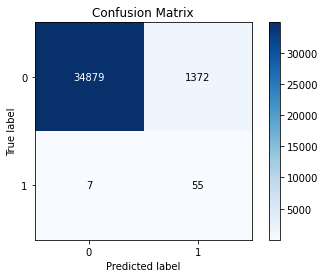

In [ ]:
# Plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_lr)

# Plotting classification report
print('Classification Report\n', classification_report(y_val, y_pred_lr, digits=4))

# Showing model accuracy
print('Model Accuracy: {:.4f}\n'.format(accuracy_score(y_val, y_pred_lr)))

# Printing area under the curve
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred_lr)))
plt.show()


As seen above in the Confusion Matrix:
- There were 36,251 (34,879+1,372) genuine transactions (class = 0). Among those, 34,879 were predicted correctly (**recall = 96.22%**) and 1,372 were predicted incorrectly as fraud transactions.
- There were 62 fraudulent transactions, of which 55 were predicted correctly (**recall = 88.7%**) and 7 were predicted as genuine (11.3%).

From the Classification Report, we can conclude:

- Precision: Among the predicted as fraud, **3.85%**(55/(55+1,372)) of the cases were predicted correctly.

- Recall: Among the real fraud, **88.7%** (55/(55+7)) of the cases were predicted correctly.

The global **accuracy** of the model was **96.2**%, meaning that 96.2% of all the predictions (fraud and non-fraud) were predicted correctly.

Finally, the **AUC-ROC** value was **92.46%**.

Let's do the same analysis using the other machine learning classification models.

## **Decision Tree Classifier**

This is a supervised learning method used for classification. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

A [decision tree](https://scikit-learn.org/stable/modules/tree.html#decision-trees) model uses a tree-like model of decisions to go from observations about an item (represented in the branches) to conclusions about the item's target value.

It is important to set the maximum depth of the tree to avoid problems like _overfitting_ (the model fits perfectly in the training data, but unfortunately, it can not perform accurately in the unseen data). I will adjust models using different max depth trees and use the best depth to create and evaluate the final decision tree model.

In [ ]:
y_rus.shape

(702,)

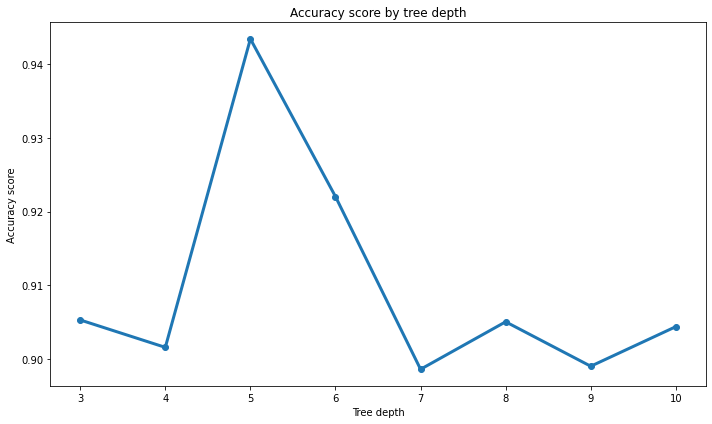

The best accuracy was 0.9434 with depth=5.


In [ ]:
# Setting min as 3 and maximum as 10
n = 11
dep = np.zeros((n-3))

for i in range(3, n):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree.fit(X_rus, y_rus)
    y_pred_tree = tree.predict(X_val)

    dep[i-3] = accuracy_score(y_val, y_pred_tree)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(3, n), dep, linewidth=3, marker='o')
ax.set_title('Accuracy score by tree depth')
ax.set_ylabel('Accuracy score')
ax.set_xlabel('Tree depth')
ax.grid(False)

plt.tight_layout()
plt.show()

best_depth = dep.argmax()+3
print(f'The best accuracy was {round(dep.max(), 4)} with depth={best_depth}.')

Classification Report
               precision    recall  f1-score   support

           0     0.9998    0.9447    0.9714     36251
           1     0.0262    0.8710    0.0509        62

    accuracy                         0.9446     36313
   macro avg     0.5130    0.9078    0.5112     36313
weighted avg     0.9981    0.9446    0.9699     36313

Model Accuracy: 0.9446

AUC: 0.9078



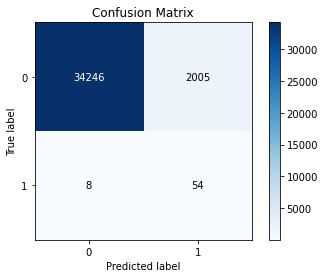

In [ ]:
# Defining and training a model
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
model_dt.fit(X_rus, y_rus)

# Forecasting using the test dataset
y_pred_dt = model_dt.predict(X_val)

# Plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_dt)

# Plotting classification report
print('Classification Report\n', classification_report(y_val, y_pred_dt, digits=4))

# Showing model accuracy
print('Model Accuracy: {:.4f}\n'.format(accuracy_score(y_val, y_pred_dt)))

# Printing area under the curve
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred_dt)))
plt.show()

Let's see what the tree we created looks like.

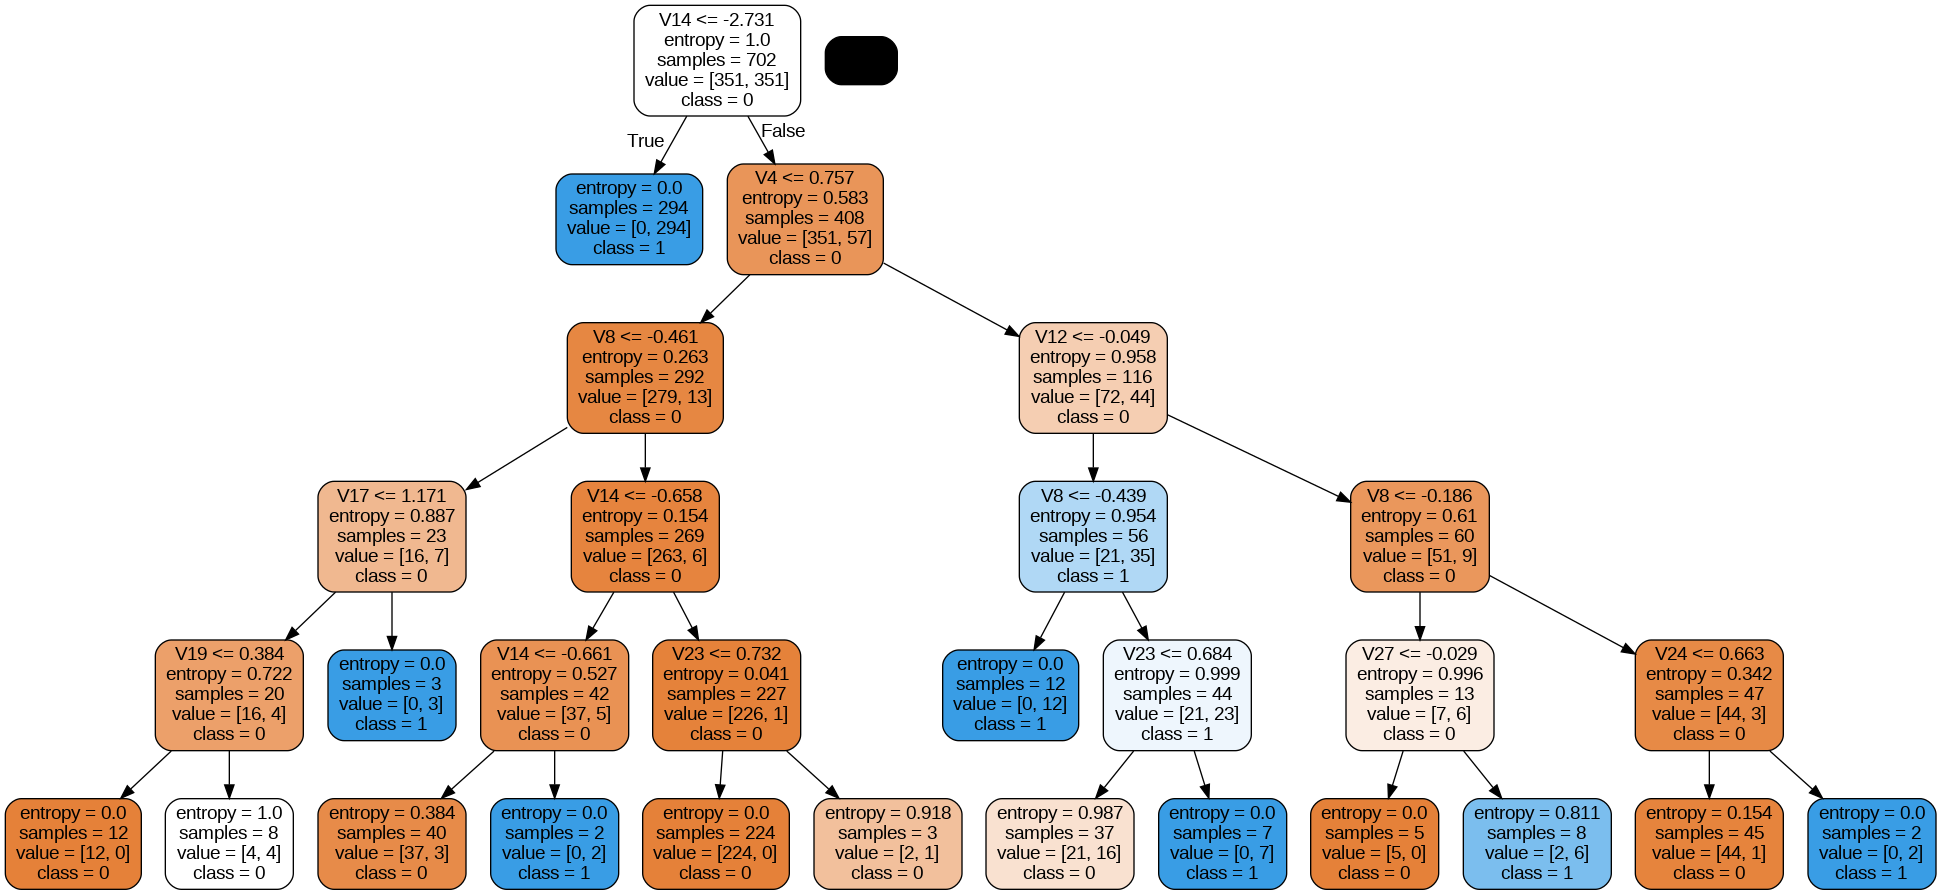

In [ ]:
# Importing libraries
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Creating DOTS
dot = export_graphviz(model_dt, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# Plotting tree
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

Conclusion:

As seen above in the Confusion Matrix,
- There were 36,251 (34,246+2,005) genuine transactions (class = 0). Among those, 34,246 were predicted correctly (**recall = 94.47%**) and 2,005 were predicted incorrectly as fraud transactions.
- There were 62 fraudulent transactions, of which 54 were predicted correctly (**recall =87.10%**) and 8 were predicted as genuine (19.35%).

From the Classification Report, we can conclude:

- Precision: Among the predicted fraud cases, **2.62%** were correct.
* Recall: Among the real fraud cases, **87.10%** were predicted correctly.

This model had a lower global accuracy compared to the logistic regression model (**94.46%**), meaning that 94.46% of all the predictions (fraud and non-fraud) were correct.

Finally, the **AUC-ROC** was **90.78%**.

In this context, we are more worried about predicting correctly when it is a fraud cause. So, we want a lower false negative, even if the model has a higher false positive. As we can see, the Logistic Regression Classifier model had better performance (lower false negatives), lower false positives than the Decision Tree model and a high AUC-ROC.

## **K-nearest Neighbors**

[K-nearest Neighbors](https://www.ibm.com/topics/knn) - KNN is a supervised machine learning algorithm that uses the distance of a new unlabeled entry from the other previously known labelled entries to predict the class of the new entry.

The KNN algorithm assumes that similar things are near to each other.
The algorithm assumes the similarity between the new data and puts the new case into the category most similar to the available categories.


<p align=center>
<img src="https://vatsalparsaniya.github.io/ML_Knowledge/_images/KNN.png" width="80%"></p>

The output can be calculated as the class with the highest frequency from the K-most similar instances. Each instance in essence votes for their class, and the class with the most votes is taken as the prediction.

In the picture, considering K=1, as the closest item to the new item belongs to class A, the new item will also be labelled as A.
If k=3, then the algorith will consider the 3 closest neighbors to classify the new example, and in this case, as we can see in the picture, it will be labeled as Class B.

I will need to set a value for k, so I will adjust a few models with different values for k and choose the k value to be used in the final model.

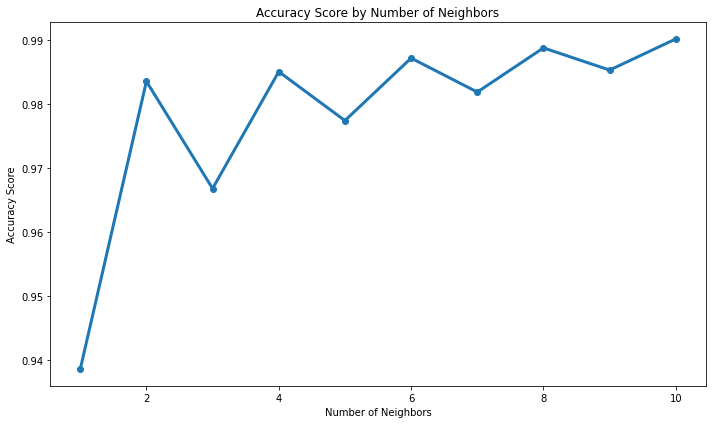

The best accuracy was 0.9902 with k=10.


In [ ]:
# Setting min as 1 and maximum as 10
ks = 11
adj_knn = np.zeros((ks-1))

for k in range(1, ks):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_rus, y_rus)
    y_pred_knn = knn.predict(X_val)

    adj_knn[k-1] = accuracy_score(y_val, y_pred_knn)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(1, ks), adj_knn, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Number of Neighbors')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Number of Neighbors')
ax.grid(False)

plt.tight_layout()
plt.show()

best_k = adj_knn.argmax()+1
print(f'The best accuracy was {round(adj_knn.max(), 4)} with k={best_k}.')

Classification Report
               precision    recall  f1-score   support

           0     0.9997    0.9905    0.9951     36251
           1     0.1310    0.8387    0.2266        62

    accuracy                         0.9902     36313
   macro avg     0.5654    0.9146    0.6108     36313
weighted avg     0.9982    0.9902    0.9938     36313

Model Accuracy: 0.9902

AUC: 0.9146



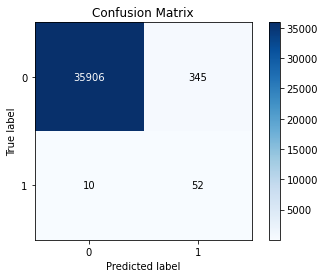

In [ ]:
# Instantiating and training a model
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_rus, y_rus)

# Forecasting using the test dataset
y_pred_knn = model_knn.predict(X_val)

# Plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_knn)

# Plotting classification report
print('Classification Report\n', classification_report(y_val, y_pred_knn, digits=4))

# Showing Model Accuracy
print('Model Accuracy: {:.4f}\n'.format(accuracy_score(y_val, y_pred_knn)))

# Printing area under the curve
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred_knn)))
plt.show()

Conclusion:

As seen above in the confusion matrix,
- There are 36251 (35906+345) genuine transactions (class = 0). Among those, 35906 were predicted correctly (**recall = 99.05%**) and 345 were predicted incorrectly as fraud transactions.

- There are 62 fraudulent transactions, of which 52 were predicted correctly (**recall = 83.87%**) and 10 were predicted as genuine (16.13%).

The **AUC-ROC** was **91.46%**.

The global accuracy was higher than the two previous models **(99.02**%),meaning that **99.02%** of all predictions (fraud and non-fraud) were correctly.

Although the false positive here was lower than the two previous models (FN=345, the False Negative was higher than the one found adjusting the Logistic Regression and Decision Tree Classifier models.

As in this type of question, we are more worried about predicting correctly when it is a fraud, so the financial institutions do not lose much money, I choose the logistic regression as the best model so far (higher AUC-ROC and higher Recall).

## **Random Forest Classifier**

[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is a powerful and versatile supervised machine learning algorithm that grows and combines multiple randomized decision trees to create a “forest".

Decision Trees tend to create series of rules and deal with the entire dataset at a time. Random Forests, however, add a pinch of randomness by choosing different random features and entries for each of the many decision trees built and then averaging the results.

This model variability theoretically creates more accurate predictions, as the many trees tend to attenuate the individual errors of each of them.

Classification Report
               precision    recall  f1-score   support

           0     0.9998    0.9727    0.9860     36251
           1     0.0526    0.8871    0.0993        62

    accuracy                         0.9725     36313
   macro avg     0.5262    0.9299    0.5427     36313
weighted avg     0.9982    0.9725    0.9845     36313

Model Accuracy: 0.9725

AUC: 0.9299



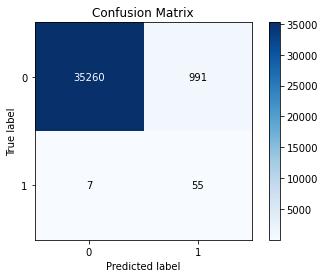

In [ ]:
# Instantiating the model
# n_estimators is the number of trees in the forest.
model_rfc = RandomForestClassifier(n_estimators= 200,random_state=0)

# Training the model with the .fit() method
model_rfc.fit(X_rus, y_rus)

# Forecasting using the validation dataset
y_pred_rfc = model_rfc.predict(X_val)

# Plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_rfc)

# Plotting classification report
print('Classification Report\n', classification_report(y_val, y_pred_rfc, digits=4))

# Showing Model Accuracy
print('Model Accuracy: {:.4f}\n'.format(accuracy_score(y_val, y_pred_rfc)))

# Printing area under the curve
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred_rfc)))
plt.show()

Conclusion:

As seen above in the confusion matrix,
- There were 36251 (35260+991) genuine transactions (class = 0). Among those, 35260 were predicted correctly (**recall = 97.27%**)and 991 were predicted incorrectly as fraud transactions.

- There were 62 fraudulent transactions, of which 55 were predicted correctly (**recall = 88.71%**) and 7 were predicted as genuine (11.29%). Here we have the same numbers found in the logistic regression model, so in terms of detecting when it is a fraudulent transaction, the model is as good as the logistic model. In this type of problem, that is one of the main goals (once the transaction is fraudulent, we want to detect it as much as possible).

Besides that, the Random Forest Classifier model also had a higher recall for non-fraud transactions (**97.27%**), while the logistic regression it was **96.22%**.
The **AUC-ROC** was **92.99%** (92.46% in the logistic regression) and the global accuracy was **97.25%** (96.20% in the logistic regression).

## **Decision of the model**

That being said, the **Random Forest Classifier** model is the model with best performance.


 ## **Evaluating on the test set**

Now that we have a best performing model, it's time to assess our model on the set aside test set. I will examine whether the results I obtained using the validation set are consistent with the results on the test set.

I will now use the best performance model we trained with this test subset. Before checking the results, the test dataset must have the same treatment as the train and validation datasets. So, here I will standardize the `time` and `amount` features in the test set before evaluating how the Random Forest Classifier model performs in the final dataset.

The test dataset was named `test_df` at the beginning of this project.

In [ ]:
# Making a copy of the test_df dataframe
test_clean = test_df.copy()

# Standardize Time and Amount
std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

# Dropping the original columns Time and Amount from the test_df dataframe
test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Checking first entries
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
73129,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,-0.283034,0.561420,0.072299,-0.927072,1.038824,0.405817,0.142775,-0.336206,0.889158,0.836360,-0.066304,0.243136,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,0,-0.157973,-0.843299
229597,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,0.705357,-1.552107,-0.415248,1.040340,-0.533137,0.076196,1.220128,-0.147484,-1.221457,0.878026,0.124636,0.174775,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,0,-0.125184,1.081458
220218,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,-0.181429,0.973005,0.852258,0.061353,-0.585198,-0.655957,0.304602,0.269934,0.493657,-0.119614,0.173336,-0.029061,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,0,0.448622,0.998749
198374,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,1.171678,-0.231315,0.401726,0.405439,-1.652165,-1.793721,-1.252411,1.285789,-0.353220,-0.399857,-0.350968,0.050867,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,0,-0.026817,0.795445
167980,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,1.014140,-0.174764,-0.447357,0.254833,0.156966,-0.216825,1.529087,-0.607303,-0.288013,1.180082,0.176958,0.455959,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,0,0.021341,0.510701


As seen above, the columns `time` and `amount` are now in the same magnitude of the V's features.

In [ ]:
# Checking the test dataset shape
test_clean.shape

(42722, 31)

In [ ]:
# Checking mean and standard deviation for the transformed features
print('The std_amount variable has mean {:.2f}, and standard deviation {:.2f}.'.format(df_clean['std_amount'].mean(), df_clean['std_amount'].std()))
print('The std_time variable has mean {:.2f} and standard deviation {:.2f}.'.format(df_clean['std_time'].mean(), df_clean['std_time'].std()))

The std_amount variable has mean 0.00, and standard deviation 1.00.
The std_time variable has mean 0.00 and standard deviation 1.00.


Now I can go ahead and split the test dataset into X and y and then evaluate the chosen machine learning performance.

In [ ]:
# Splitting test set into X(features) and y(target)
X_test = test_clean.drop('Class', axis=1)
y_test = test_clean['Class']

Now we are ready to check the Random Forest Classifier model performance.

Classification Report
               precision    recall  f1-score   support

           0     0.9999    0.9716    0.9856     42643
           1     0.0584    0.9494    0.1101        79

    accuracy                         0.9716     42722
   macro avg     0.5292    0.9605    0.5478     42722
weighted avg     0.9982    0.9716    0.9840     42722

Model Accuracy: 0.9716

AUC: 0.9605



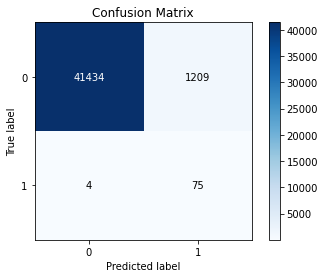

In [ ]:
# Forecasting using the test dataset
predicted_y =  model_rfc.predict(X_test)

# Plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, predicted_y)

# Plotting classification report
print('Classification Report\n', classification_report(y_test, predicted_y, digits=4))

# Showing Model Accuracy
print('Model Accuracy: {:.4f}\n'.format(accuracy_score(y_test, predicted_y)))

# Printing area under the curve
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, predicted_y)))
plt.show()

As we can see, the chosen model **Random Forest Classifier** predicted **97.16%** of the labels correctly. The false negative was **4** and false positive was **1209**. Among the frauds, it predicted correctly **94.94%** (4/(4+75)). Among the genuine transactions, it predicted correctly **97.16%** (41434/(41434+1209)). It had better performance with the test set than with the validation dataset.

The **AUC-ROC** is **96.05%** (it was **92.46%** in the validation dataset). The accuracy was slightly lower in the test set (**97.16%**) compared to the validation set (**97.25%**), but it is still a very high accuracy.

Compared to the **Random Forest Classifier** using the validation set, we can conclude that the model performance has proved **superior performance** using the test set, which is good.

**Conclusion**

In this project, I analyzed the creditcard dataset, available on Kaggle, which includes the transactions that occurred in two days in September 2013, by European cardholders.
I used some classification models to predict whether the transaction is fraudulent or genuine based on variables such as transaction amount, transaction time compared with the first transaction in the dataset, and some other variables that were transformed with PCA dimensionality reduction to protect user identities.

The positive label I considered for this data was a fraud, and that is the class I am most interested in order to detect and avoid new fraudulent transactions.

From my analysis, after working with the models Logistic Regression Classifier, Decision Tree classifier, K-nearest Neighbors and Random Forest Classifier, I conclude that the best model for prediction was the **Random Forest Classifier**, which had a better combination of higher Recall, precision, and Area Under the Curve (AUC-ROC).

The chosen model performed well, predicting 97.16% of the labels correctly in the test data. Among the fraudulent transactions, it predicted correctly 94.94% and among the regular transactions, it predicted correctly 97.16%.

It is worth to mention that the model had a slightly better performance in the test set compared to the validation set, which indicates the model worked well with unseen datasets.

Finally, even though the final model showed an outstanding final result, there is always room for improvement. For instance, different methods of data balancing that might contribute to increasing the final model performance, as well as using some other classification algorithms, and optimizing their parameters.


<br/>

Hope you enjoyed it!
Questions, suggestions for improvement, and corrections are welcome, and thank you for analyzing the data with me so far!



## Resources used
* [Hands-on Data Science by Sigmoidal](https://sigmoidal.ai/)
* [Python Programming](https://www.python.org/)
* [Credit Card Fraud Detection - Data Source](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
* [Missing values](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)
* [How to deal with unbalanced data?](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/)
* [Introduction to Logistic Regression](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)
* [K-Nearest Neighbor(KNN) Algorithm for Machine Learning](https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning)
* [K-Nearest Neighbors (KNN) Algorithm for Machine Learning](https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26)
* [Python Data Science Handbook by Jake VanderPlas. In-Depth: Decision Trees and Random Forests](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)
* [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [CPA Canada study](https://www.cpacanada.ca/en/the-cpa-profession/about-cpa-canada/media-centre/2022/february/many-canadians-report-being-a-victim-of-financial-fraud-but-may-not-be-doing-enough-to-avoid-it)
* [Credit card fraud (From: Financial Consumer Agency of Canada)
](https://www.canada.ca/en/financial-consumer-agency/services/credit-fraud.html)
